<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
import zipfile

In [58]:
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')

In [59]:
zip_ref.extractall('/content')

In [60]:
zip_ref.close()

In [61]:
import os
os.listdir('/content')

['.config',
 'test.csv',
 'train.csv',
 'mobile-price-classification.zip',
 'sample_data']

In [62]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [63]:
df = pd.read_csv("/content/test.csv")

In [64]:
df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [65]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [66]:
train_set, test_set = train_test_split(df, test_size=0.2)


In [67]:
train_set.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [68]:
train_set = train_set[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [69]:
test_set = test_set[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [70]:
X_train = train_set[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y_train = train_set["ram"]

In [71]:
X_test = test_set[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y_test = test_set["ram"]

In [72]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [73]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [74]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeRegressor(max_depth=3))])

In [75]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
       'wifi'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('clf', DecisionTreeRegressor(max_depth=3))])

In [76]:
predictions = pipeline.predict( X_test )

In [77]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [78]:
pcv_scores = -cv_scores
pcv_scores

array([1290455.38633305, 1244622.46264611, 1162926.52392119,
       1392850.43762053, 1441825.13251518])

[Text(0.5, 0.875, 'x[10] <= 0.733\nsquared_error = 1179888.316\nsamples = 800\nvalue = 2149.834'),
 Text(0.25, 0.625, 'x[15] <= 1.335\nsquared_error = 1165482.408\nsamples = 567\nvalue = 2220.621'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[8] <= -0.704\nsquared_error = 1172007.777\nsamples = 492\nvalue = 2165.126'),
 Text(0.0625, 0.125, 'squared_error = 1098762.514\nsamples = 145\nvalue = 1995.607'),
 Text(0.1875, 0.125, 'squared_error = 1185588.63\nsamples = 347\nvalue = 2235.963'),
 Text(0.375, 0.375, 'x[14] <= -0.881\nsquared_error = 969943.956\nsamples = 75\nvalue = 2584.667'),
 Text(0.3125, 0.125, 'squared_error = 610216.743\nsamples = 12\nvalue = 1863.417'),
 Text(0.4375, 0.125, 'squared_error = 920503.887\nsamples = 63\nvalue = 2722.048'),
 Text(0.75, 0.625, 'x[11] <= 1.286\nsquared_error = 1173078.03\nsamples = 233\nvalue = 1977.575'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= 1.381\nsquared_error = 1153164.585\nsamples = 201\nvalue = 1901.348'),
 

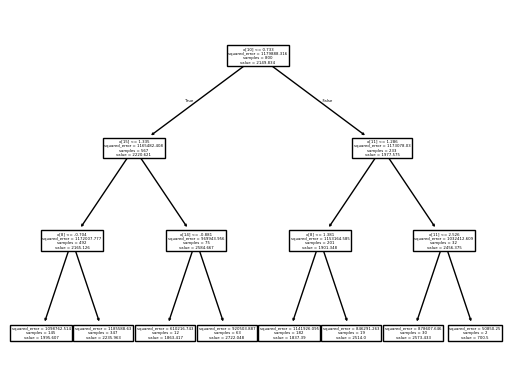

In [79]:
plot_tree( pipeline.named_steps['clf'])